In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [28]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


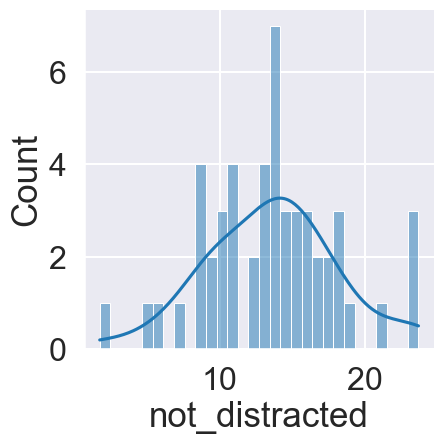

In [29]:
#DISTPLOT - SINGLE DISTRIBUTION
sns.displot(crash_df['not_distracted'],kde = True,bins = 30)

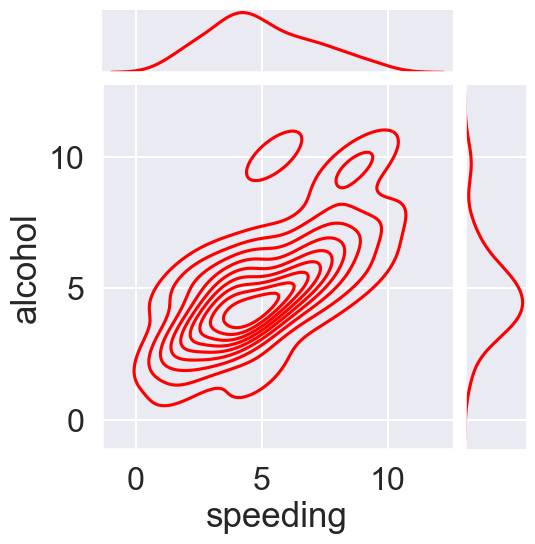

In [30]:
#JOINT PLOT - COMPARE TWO DISTRIBUTIONS 
sns.jointplot(x = 'speeding', y = 'alcohol', data = crash_df, kind = 'kde', color = 'red')

<Axes: xlabel='alcohol', ylabel='Density'>

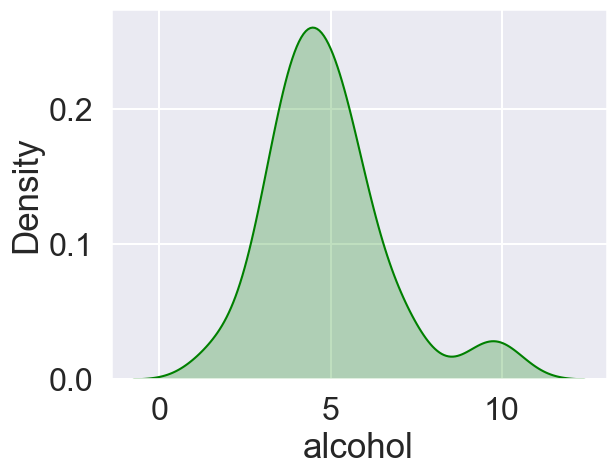

In [31]:
#kde plots - smoothed version of histogram
sns.kdeplot(crash_df['alcohol'],fill = True,color = 'green')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


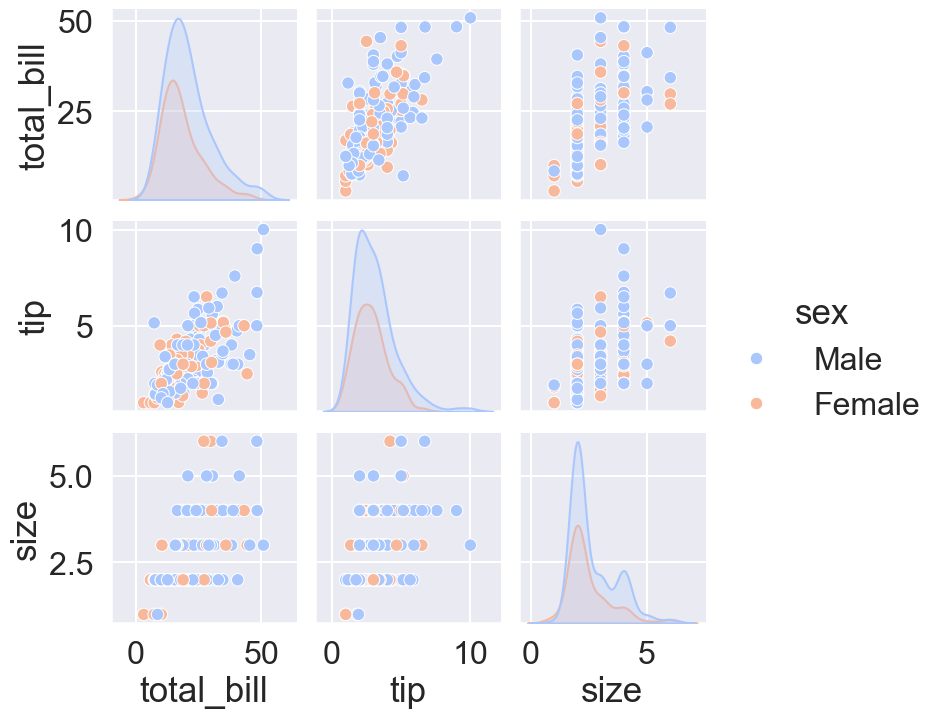

In [32]:
#pair plot - compare multiple distributions at once
tips_df = sns.load_dataset('tips')
print(tips_df.head())
sns.pairplot(tips_df,hue = 'sex',palette = 'coolwarm')


<Axes: xlabel='tip'>

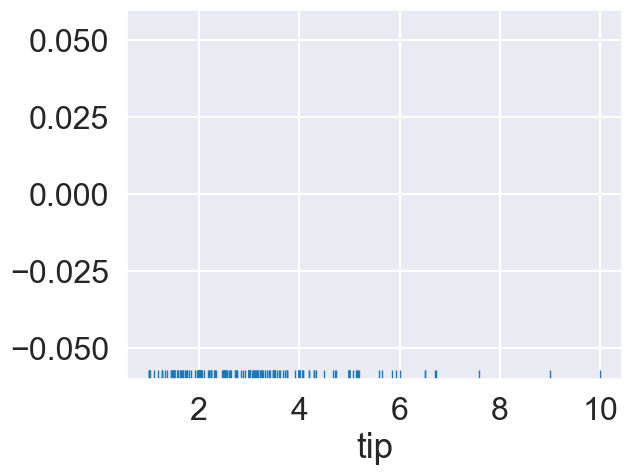

In [33]:
#rug plot - small vertical lines to show distribution
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 800x400 with 0 Axes>

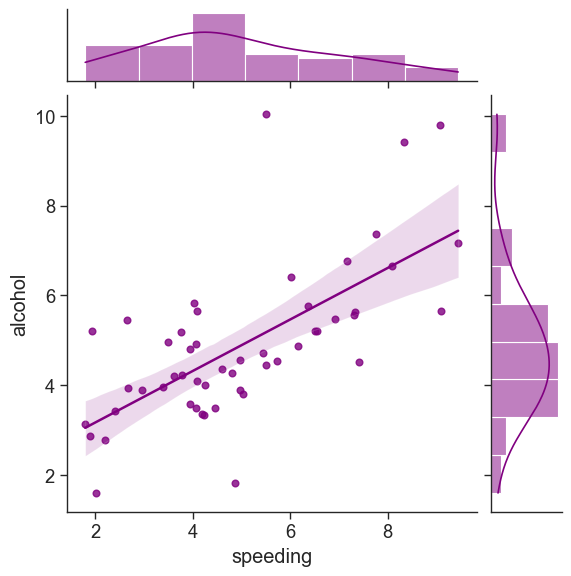

In [34]:
sns.set_style('ticks')#white,dark,ticks
sns.set_context('paper',font_scale = 1.5)


plt.figure(figsize=(8,4))


sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind = 'reg',color='purple')

sns.despine()#what happens to the left and bottom happens to the right and top respectively.

### Categorical plots

#### bar plot

<Axes: xlabel='sex', ylabel='total_bill'>

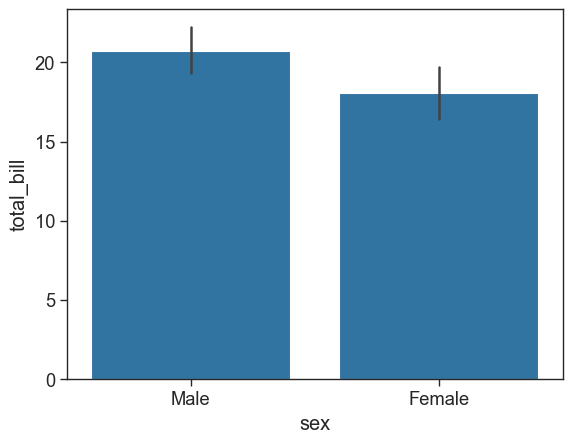

In [35]:
sns.barplot(x='sex',y='total_bill',data = tips_df,estimator = np.mean)#u could also make your own functions in estimator

#### Count plot

<Axes: xlabel='sex', ylabel='count'>

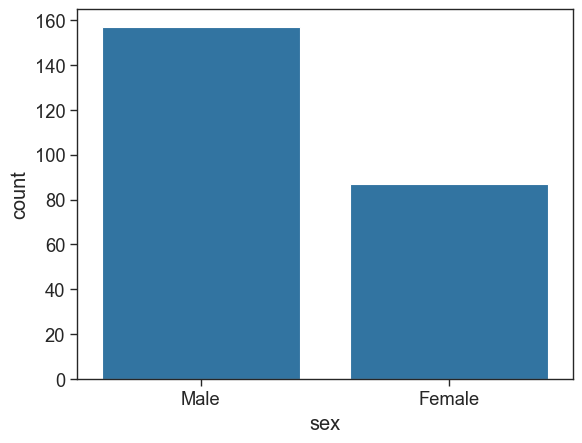

In [36]:
sns.countplot(x='sex',data = tips_df)#we want to find out no of males and females from our df we are working with.here estimator is to count no of occurences

#### Box plot

<Axes: xlabel='day', ylabel='total_bill'>

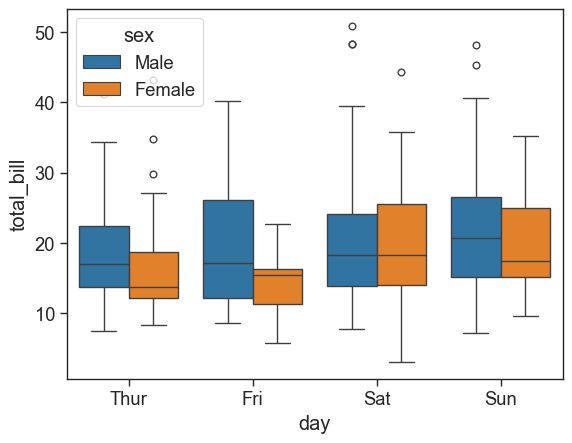

In [37]:
sns.boxplot(x='day',y ='total_bill',data = tips_df,hue = 'sex')#
#the line that goes across is the median

#### Violin plot

<Axes: xlabel='day', ylabel='total_bill'>

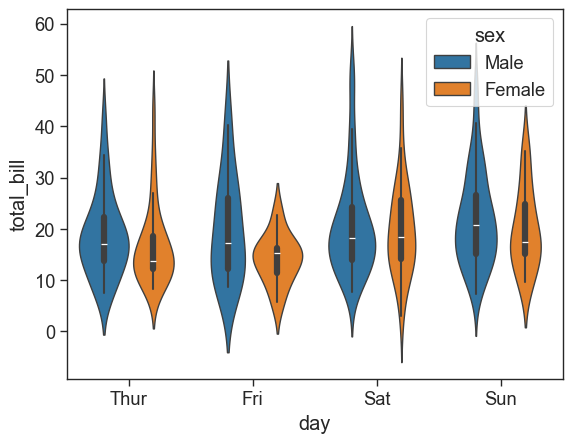

In [38]:
sns.violinplot(x='day',y ='total_bill',data = tips_df,hue = 'sex')#it is a combination of boxplot and kde plot

#### Strip plot

<Axes: xlabel='day', ylabel='total_bill'>

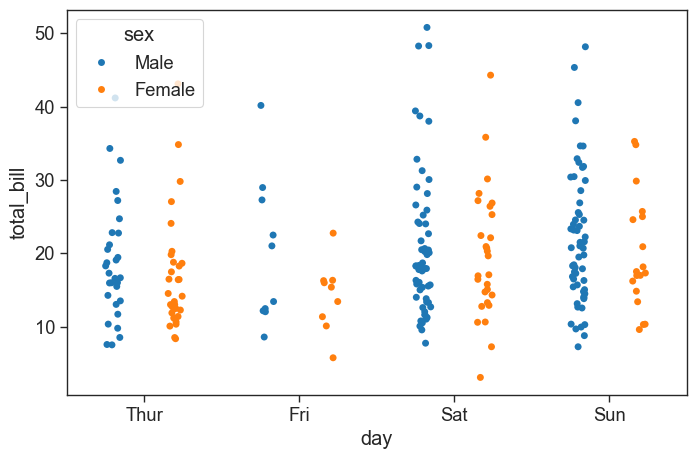

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(x = 'day',y = 'total_bill',data = tips_df,jitter = True, hue = 'sex',dodge = True)#basically it's going to plot a scatter plot

#### Swarm plot

C:\Users\Asharaf\AppData\Local\Temp\ipykernel_9116\2581430350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='day',y ='total_bill',data = tips_df,palette = 'rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

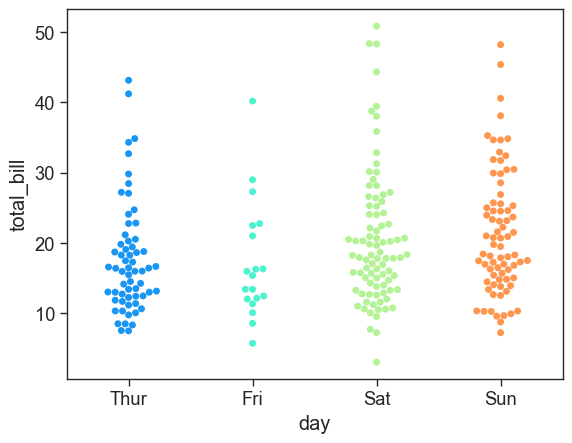

In [40]:
#it combines capabalities of two or more other plots(sort of combination b/w violin & strip)
#sns.violinplot(x = 'day',y = 'total_bill',data = tips_df)
sns.swarmplot(x='day',y ='total_bill',data = tips_df,palette = 'rainbow')

### Palettes

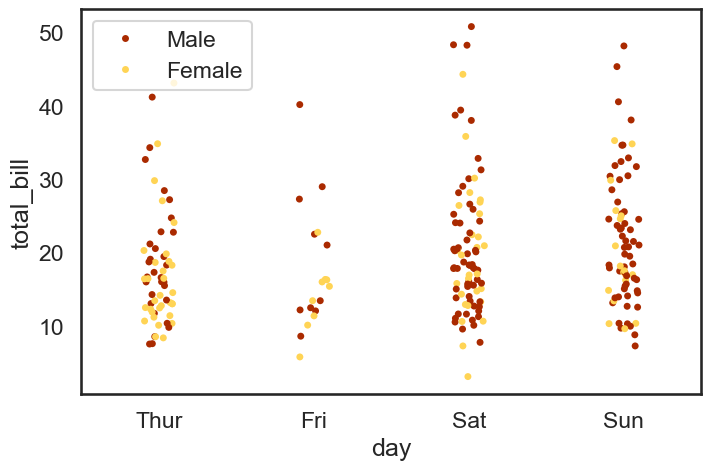

In [41]:
plt.figure(figsize = (8,5))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(x='day',y ='total_bill',data = tips_df,hue = 'sex',palette = 'afmhot')
plt.legend(loc = 0)

## Matrix Plots

#### Heat maps

<Axes: >

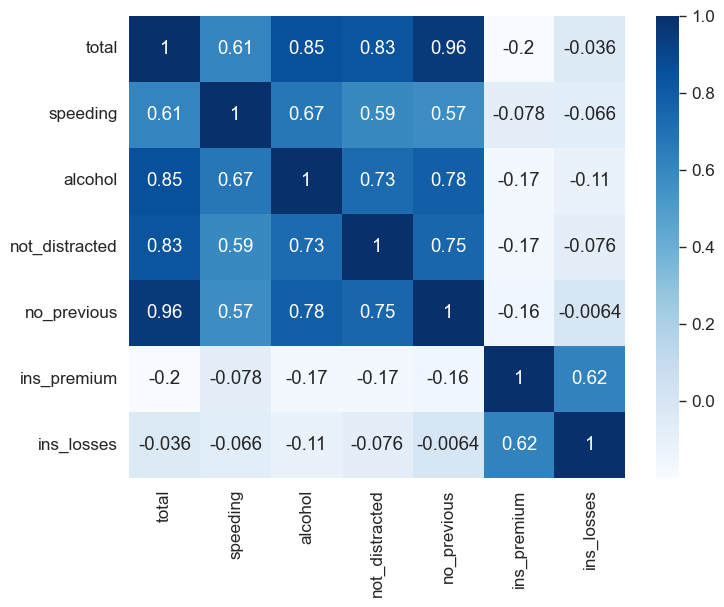

In [42]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale = 1.4)

crash_mx = crash_df.corr(numeric_only=True)

sns.heatmap(crash_mx  , annot=True , cmap = 'Blues')#annot is used for numbers inside heatmap

C:\Users\Asharaf\AppData\Local\Temp\ipykernel_9116\3878367259.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights.pivot_table(index = 'month',columns = 'year',values = 'passengers')


<Axes: xlabel='year', ylabel='month'>

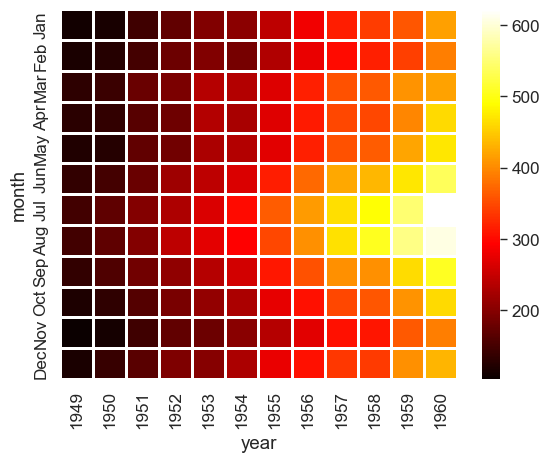

In [43]:
#another way of creating crash_mx(matrix format)

flights = sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month',columns = 'year',values = 'passengers')
sns.heatmap(flights, cmap ='hot' , linecolor = 'white',linewidth = 1)

#### Cluster maps

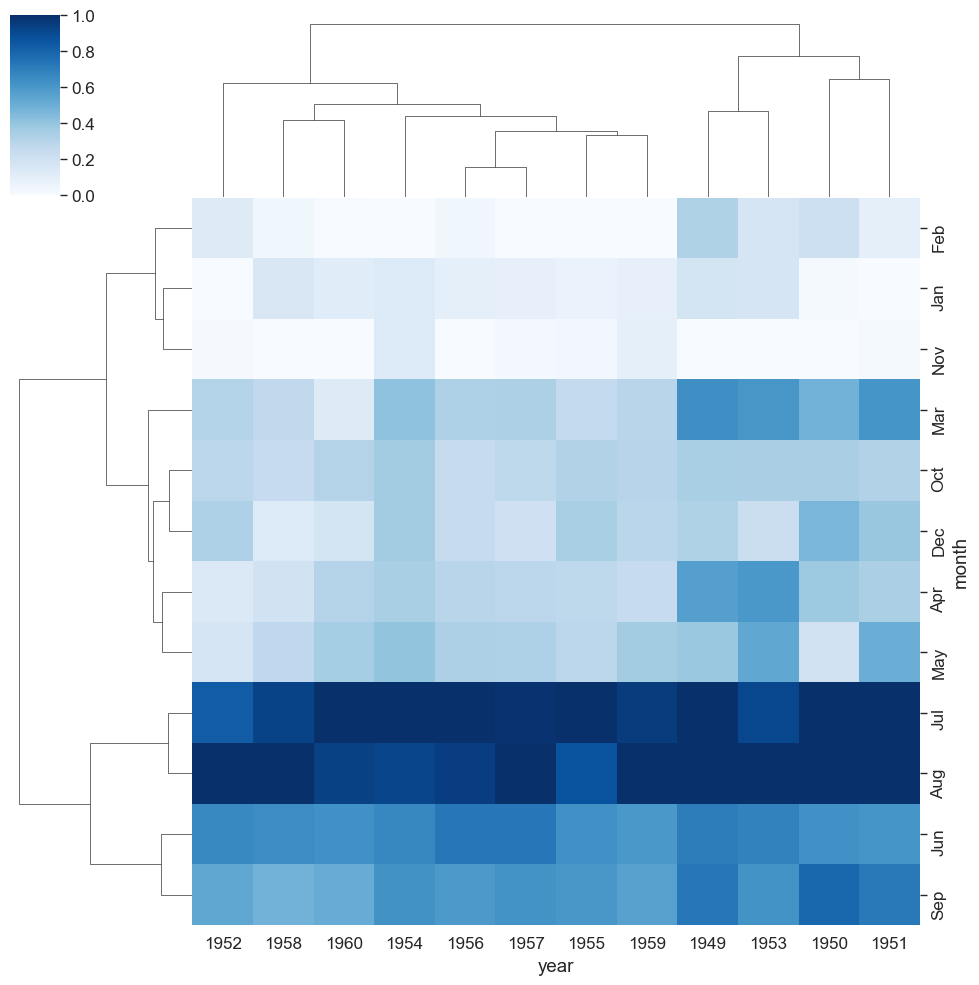

In [44]:
sns.clustermap(flights,cmap = 'Blues',standard_scale=True)

### Grids

##### Pairgrid

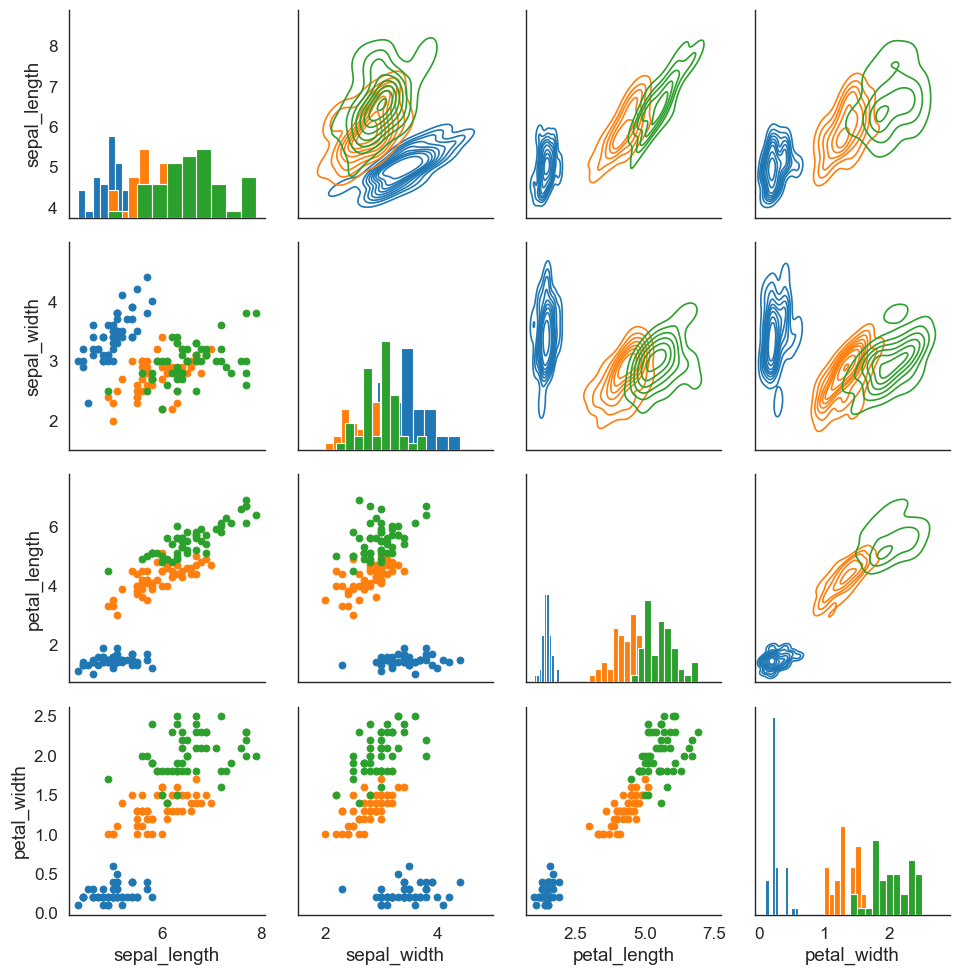

In [45]:
iris_df = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris_df,hue = 'species')
iris_g.map_diag(plt.hist)
#iris_grid.map_offdiag(plt.scatter)
iris_g.map_upper(sns.kdeplot)
iris_g.map_lower(plt.scatter)


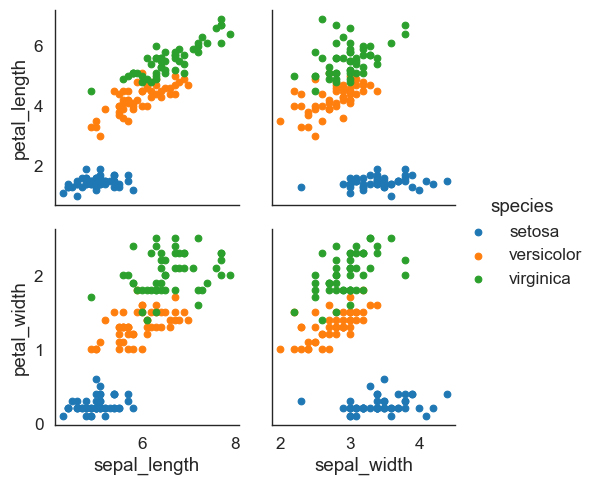

In [46]:
#CUSTOM PLOT
iris_g = sns.PairGrid(iris_df,hue = 'species',
                      x_vars =  ['sepal_length','sepal_width'],
                      y_vars = ['petal_length','petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

#### Facet Grid

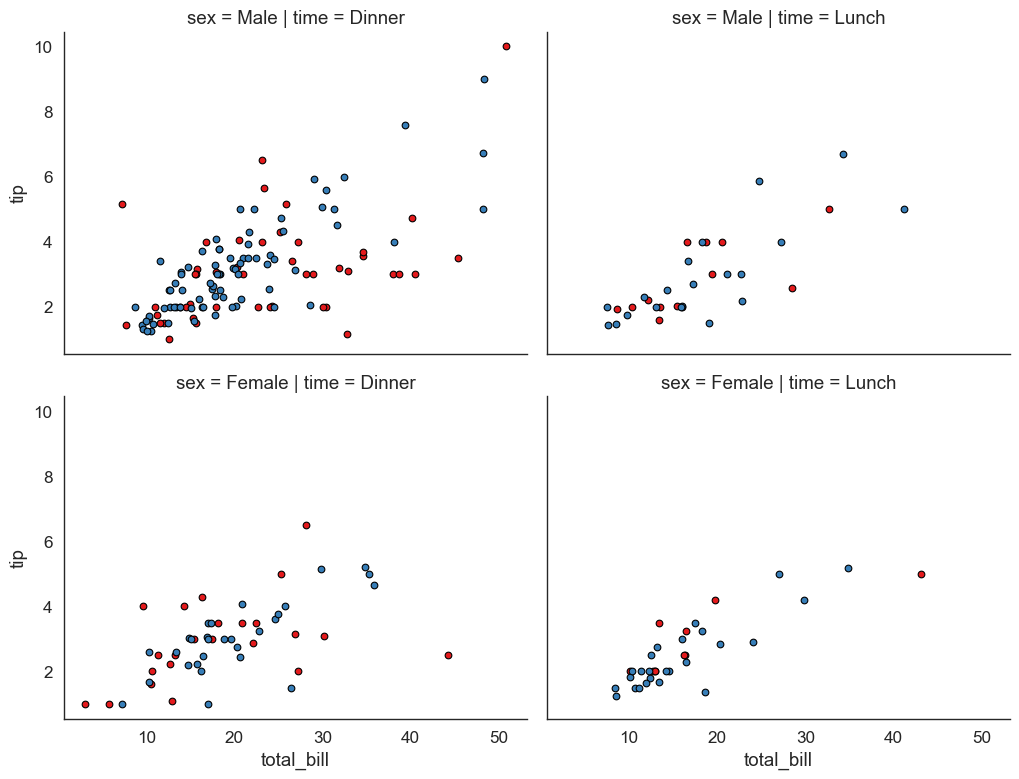

In [47]:
tips_fg = sns.FacetGrid(tips_df,col ='time',row = 'sex',hue= 'smoker',height = 4 , aspect = 1.3,
                                col_order = ['Dinner','Lunch'],palette='Set1')
tips_fg.map(plt.scatter,'total_bill','tip',edgecolor = 'black')

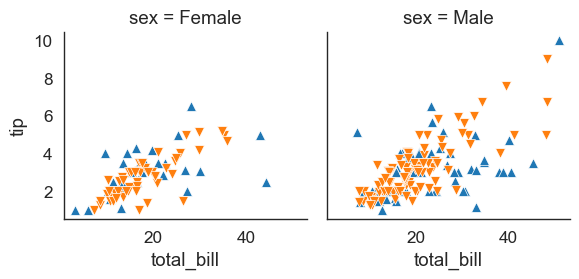

In [48]:

kws = dict(s = 50,linewidth = .5, edgecolor = 'w')
tips_fg = sns.FacetGrid(tips_df,col = 'sex',
                        hue = 'smoker',col_order=['Female','Male'],
                        hue_kws=dict(marker = ['^','v']))

tips_fg.map(plt.scatter,'total_bill','tip',**kws)


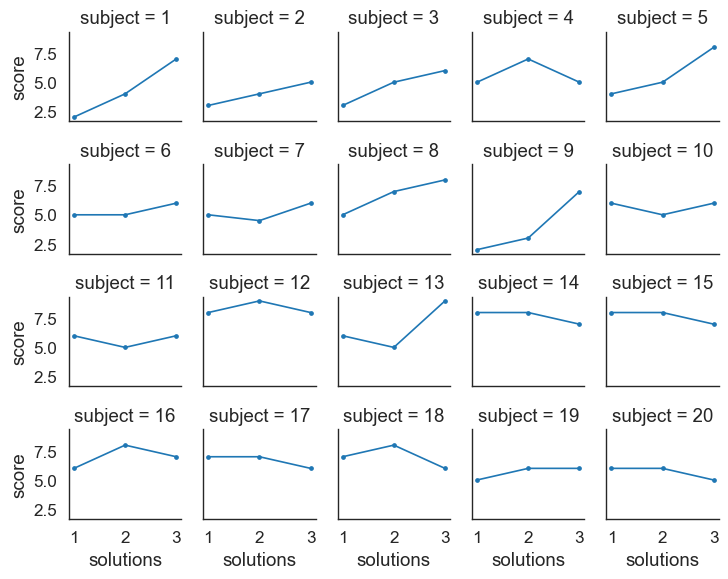

In [49]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df,col = 'subject',col_wrap = 5,height = 1.5)
att_fg.map(plt.plot,'solutions','score',marker = '.')#plotting sub and their scores

#### Regression plots

In [50]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

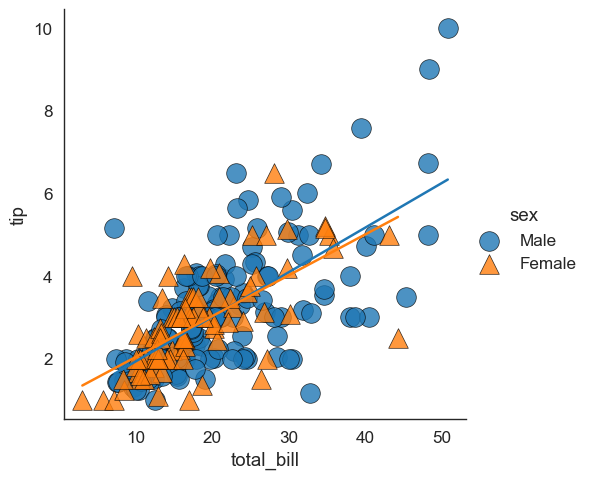

In [51]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale =1.4)
#want to study whether the total bill is going to affect the tip amount
sns.lmplot(x ='total_bill',y = 'tip',hue='sex',data = tips_df ,markers =['o','^'],
           scatter_kws={'s':200,'linewidths': .5,'edgecolor' : 'black'},
           ci = None)#hue used for separation b/w men and women
#lmplot = large model , regplot = regular
#Shaded area : confidence interval(uncertainity zone)

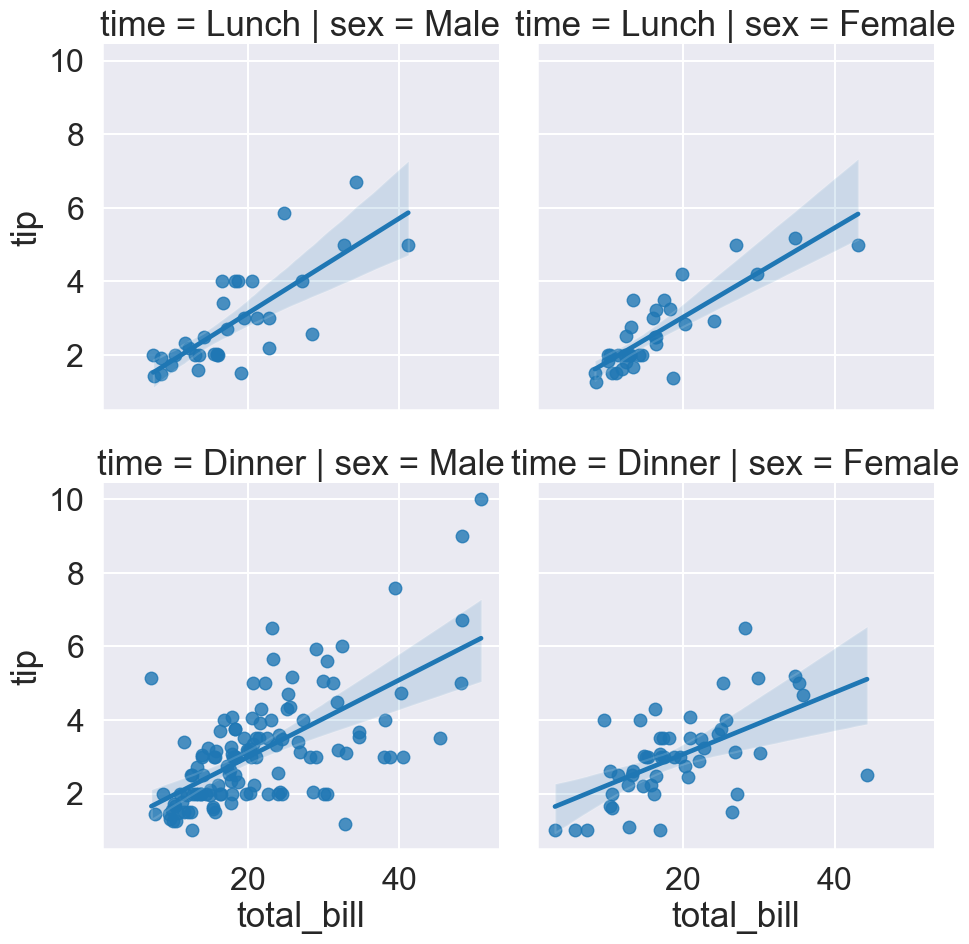

In [52]:
sns.set_context('talk',font_scale =1.4)
sns.set_style('darkgrid')
sns.lmplot(x ='total_bill',y = 'tip',col='sex',row = 'time',data = tips_df)